# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

## 신경망 정의

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #아키텍쳐 정의
        
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*6*6,120)#output - 120
        self.fc2 = nn.Linear(120,84)#output - 84
        self.fc3 = nn.Linear(120,10)#output - 10
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        
        return x
    
    def num_flat_features(self, x):
        print(x)
        print(1)
        size = x.size()[1:]
        num_flatures =1
        for s in size:
            num_flatures *= s
            
        return num_flatures

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


# 선형회귀(Linear Regression) 모델 생성
- 코드 출처 : https://yceffort.kr/2019/02/19/pytorch-02-linear-regression/

## modules import

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim 

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")


## 데이터 생성 및 회귀식 설정

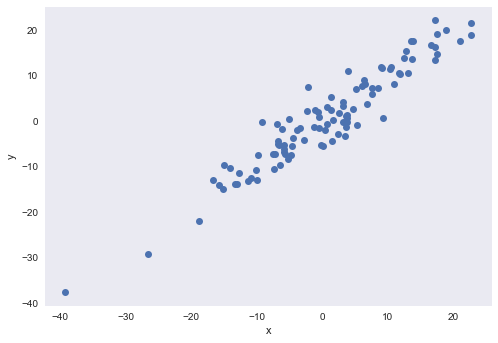

In [5]:
x = torch.randn(100,1)*10

y = x + 3 *torch.randn(100,1)
# print(x.shape)
# print(y.shape)
plt.plot(x.numpy(),y.numpy(), "o")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

## 신경망 구성

In [6]:
# class LinearRegressionModel(nn.Module):
#     def __init__(self):
#         super(LinearRegressionModel,self).__init__()
#         self.linear = nn.Linear(1,1)
        
#     def forward(self, x):
#         pred = self.linear(x)
#         return pred
        
    
#############################

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self, x):
        pred =self.linear(x)
        return pred

## 모델 생성 및 파라미터 확인

In [7]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [8]:
print(model.parameters())
print(list(model.parameters()))

<generator object Module.parameters at 0x0000012C6F049BA0>
[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


[-12.10596991  13.76194048]


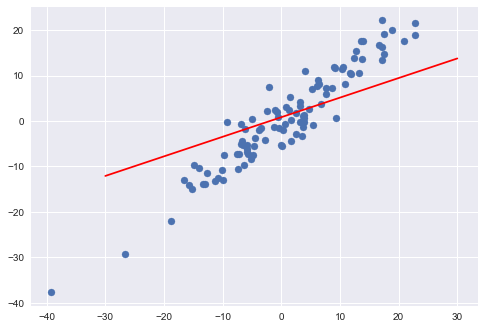

In [9]:
w,b = model.parameters()
def get_params():
    return w[0][0].item(),b[0].item()

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30,30])
    
    y1 = w1*x1 +b1
    print(y1)
    plt.plot(x1,y1,"r")# 선 만들기
    # plt.plot(x1,y1,"o")
    plt.scatter(x,y)
    plt.show()

plot_fit("Initial Model")

## 손실함수와 옵티마이저

In [10]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.0001)


## 모델 학습

In [11]:
epochs =100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred,y)
    losses.append(loss)
    loss.backward()
    
    optimizer.step()
    if epoch %10 ==0:
        print(f"Epoch : {epoch} loss : {loss:.4f}")

Epoch : 0 loss : 43.2131
Epoch : 10 loss : 31.1951
Epoch : 20 loss : 23.7217
Epoch : 30 loss : 19.0738
Epoch : 40 loss : 16.1829
Epoch : 50 loss : 14.3843
Epoch : 60 loss : 13.2648
Epoch : 70 loss : 12.5677
Epoch : 80 loss : 12.1331
Epoch : 90 loss : 11.8618


## 시각화

<class 'int'>
<class 'list'>


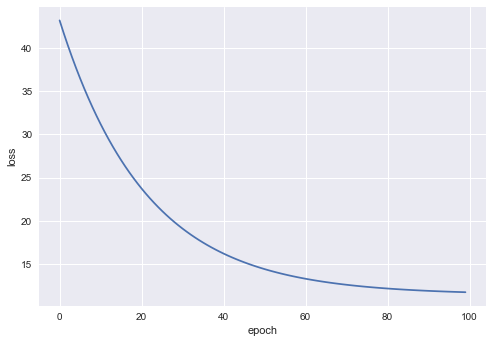

In [13]:
# print(type(epochs))
# print(type(losses))

losses_1 = [i.item() for i in losses]

plt.plot(range(epochs),losses_1)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

[-26.2782951   27.90550274]


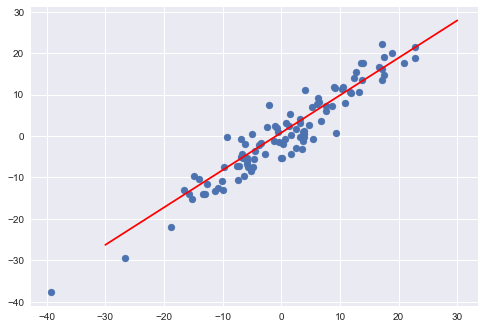

In [14]:

plot_fit("Trained Model")